<a href="https://colab.research.google.com/github/A-Wadhwani/ME498-Project/blob/main/03_LightGBM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Open drive

from google.colab import drive
drive.mount('/content/drive')

In [14]:
# Download LightGBM
! git clone --recursive https://github.com/Microsoft/LightGBM

# Enable LightGBM with GPU acceleration
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;    


fatal: destination path 'LightGBM' already exists and is not an empty directory.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory:

In [31]:
# GPU Usage tracking
!pip install wandb
import wandb
wandb.init()

     |████████████████████████████████| 2.1MB 17.9MB/s 
     |████████████████████████████████| 133kB 54.3MB/s 
     |████████████████████████████████| 163kB 54.1MB/s 
     |████████████████████████████████| 102kB 15.7MB/s 
     |████████████████████████████████| 71kB 12.1MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=1181a0d2f90236dea80ba33452e0482edfa4e5ec92d7c19304bde83aa475e3c4
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=349ef93fab9b0620ed967f92c0698faa0944bafa45c4bfc63e8ee8e497ccdaf6
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import tensorflow as tf
import pandas as pd
import random
import time
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error

import lightgbm as lgb
print("TensorFlow version: ",tf.__version__)  #print the version of tensorflow

TensorFlow version:  2.4.1


In [ ]:
# Reading training and testing dataset files
path = "drive/My Drive/ASHRAE_DATA/"
x_train = pd.read_csv(path + "x_train.csv", index_col=0)
x_test = pd.read_csv(path + "x_test.csv", index_col=0)
y_train = pd.read_csv(path + "y_train.csv", index_col=0)
y_test = pd.read_csv(path + "y_test.csv", index_col=0)

In [ ]:
x_train.info()

In [46]:
# Create LightGBM Regressor model
start_time = time.time()
model = lgb.LGBMRegressor(n_estimators=20000, n_jobs=-1, metric='rmse', device="gpu")
model.fit(x_train, y_train)
end_time = time.time()
print("Training Time: ", end_time-start_time, " seconds")

Training Time:  463.6980028152466  seconds


In [47]:
start_time = time.time()
y_res = model.predict(x_test)
end_time = time.time()
print("Prediction Time: ", end_time-start_time, " seconds")

Prediction Time:  432.84678173065186  seconds


In [48]:
print("RMSE: ", mean_squared_error(y_test, y_res))
print("R^2 Score: ", r2_score(y_test, y_res))

RMSE:  475.9749880802559
R^2 Score:  0.994336980280572


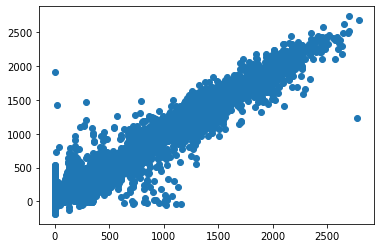

In [49]:
plt.scatter(y_test, y_res)
plt.show()